In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

a=pd.read_csv("myexcel.csv")
a.head()
#Height column is a string.

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [2]:
a.info()
#Two columns contain null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [3]:
z=a

def heightcorr(b):
    c=b.split('-')
    d=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    e=0
    f=0
    if c[0] in d:
        for i in range(12):
            if c[0]==d[i]:
                e=i+1
                break
    else:
        for i in range(12):
            if c[1]==d[i]:
                f=i+1
                e=int(c[0])
                break
    if e<6:
        if f>6:
            return random.randint(155,160)
        else:
            return random.randint(150,155)
    elif e<7:
        if f<=6:
            return random.randint(160,165)
        else:
            return random.randint(165,170)
    else:
        if f<=6:
            return random.randint(170,175)
        else:
            return random.randint(175,180)

z['Height']=list(map(lambda x:heightcorr(x),z['Height']))
z['College'].fillna("Unknown",inplace=True)
#College column is irrelevant in analysis so null values are replaced with a string.

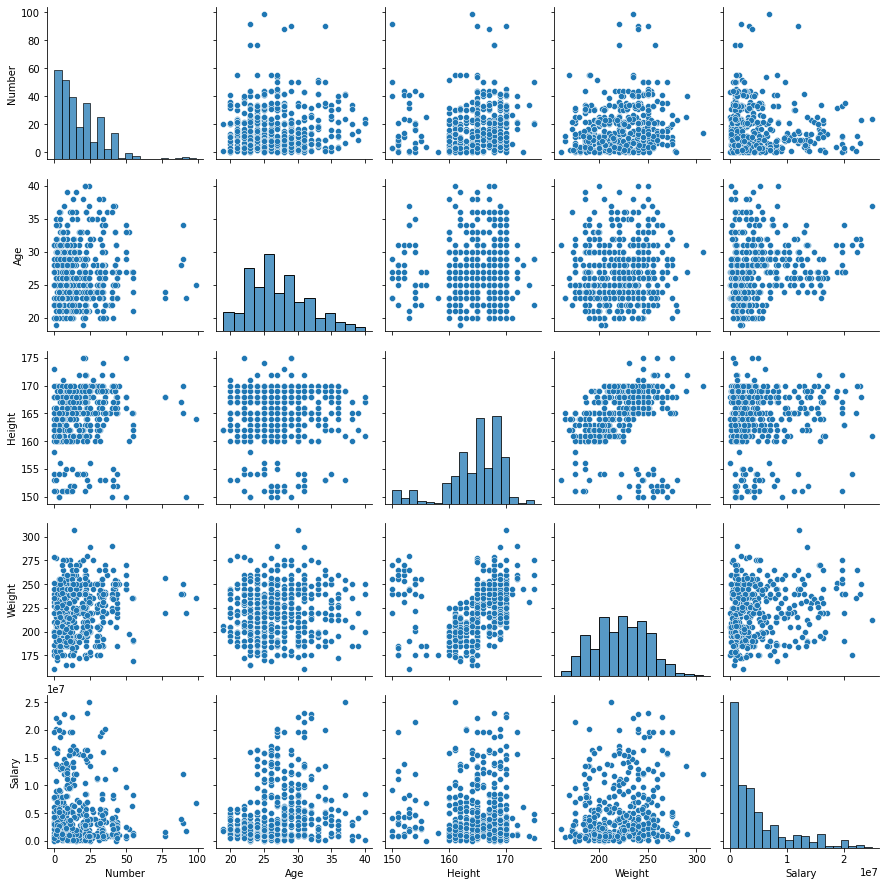

In [4]:
sns.pairplot(z)
plt.show()

In [5]:
y=pd.DataFrame(z.groupby(by=['Team']).size().reset_index(name='No of employees'))
y['Percentage']=y['No of employees']/sum(y['No of employees'])*100
y

,Team,No of employees,Percentage
0,Atlanta Hawks,15,3.275109
1,Boston Celtics,15,3.275109
2,Brooklyn Nets,15,3.275109
3,Charlotte Hornets,15,3.275109
4,Chicago Bulls,15,3.275109
5,Cleveland Cavaliers,15,3.275109
6,Dallas Mavericks,15,3.275109
7,Denver Nuggets,15,3.275109
8,Detroit Pistons,15,3.275109
9,Golden State Warriors,15,3.275109


In [6]:
y['No of employees'].mode()

0    15
Name: No of employees, dtype: int64

In [7]:
y['No of employees'].std()

0.980265035707122

In [8]:
y['No of employees'].median()

15.0

In [9]:
y['No of employees'].mean()

15.266666666666667

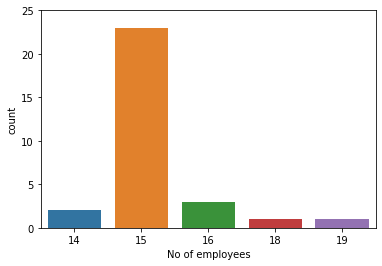

In [10]:
ax=sns.countplot(x='No of employees',data=y)
ax.set_ylim(bottom=0,top=25)
plt.show()
#1. 23 out of 30 teams have 15 employees on their payscale which is approximately 77% of total teams.
#2. 2 teams(Orlando magic,Minnesota Timberwolves) have lowest employee count=14 employees.
#3. New Orleans Pelicans team has largest employee count=19 employees.
#4. Mean, median and mode is approx 15.
#5. The standard deviation is very low=0.98

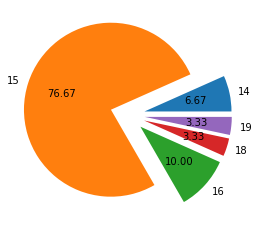

In [11]:
t=y.groupby(by=['No of employees']).size().reset_index(name='Count')
plt.pie(x='Count',labels='No of employees',data=t,explode=[.2,.2,.2,.2,.2],autopct='%.2f')
plt.show()
#1. The distribution of employees in teams are highly dominated by 15. 
#2. The remaining numbers are roughly a pattern ie 3.33,3.33*1,3.33*2,3.33*3

In [12]:
q=z.groupby(['Team','Position']).size().reset_index(name='No of players')
q

,Team,Position,No of players
0,Atlanta Hawks,C,3
1,Atlanta Hawks,PF,4
2,Atlanta Hawks,PG,2
3,Atlanta Hawks,SF,2
4,Atlanta Hawks,SG,4
...,...,...,...
144,Washington Wizards,C,3
145,Washington Wizards,PF,2
146,Washington Wizards,PG,2
147,Washington Wizards,SF,4


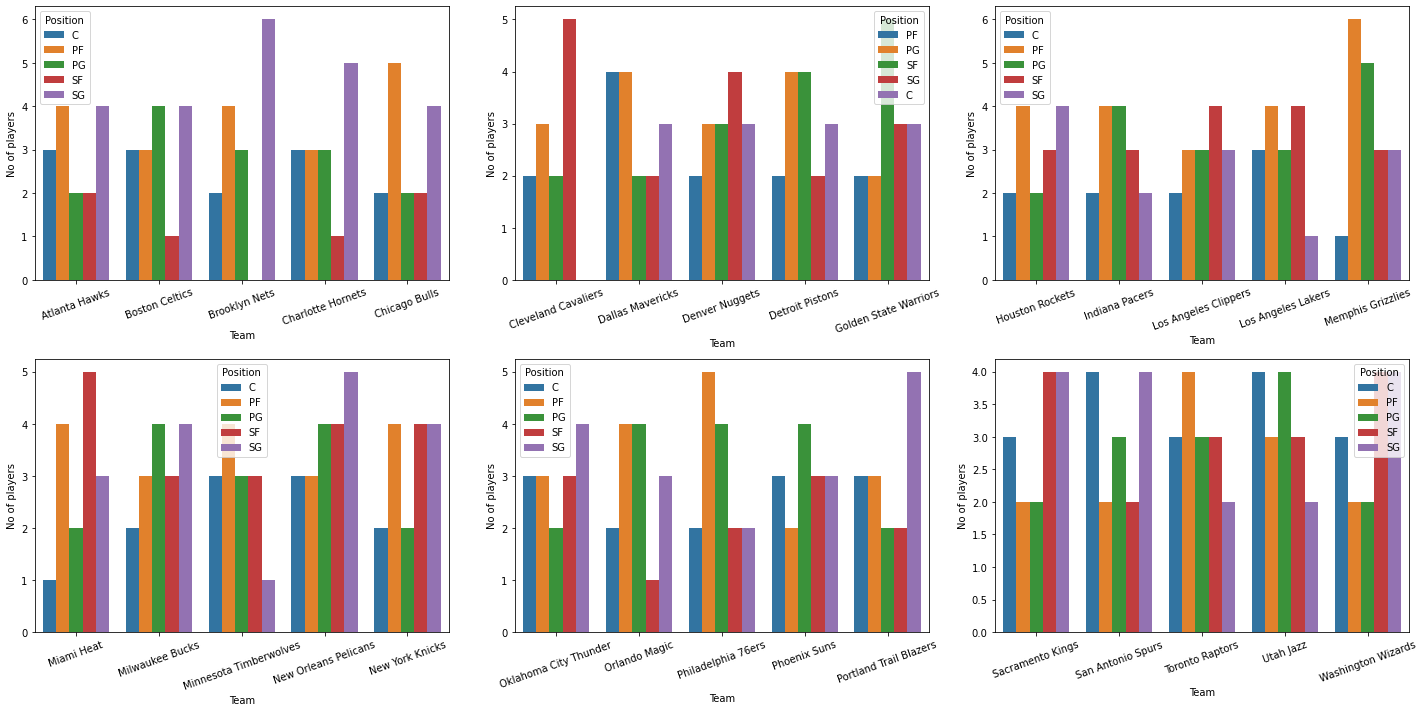

In [13]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.barplot(ax=axes[0,0],x='Team',y='No of players',hue='Position',data=q.iloc[0:24])
sns.barplot(ax=axes[0,1],x='Team',y='No of players',hue='Position',data=q.iloc[25:49])
sns.barplot(ax=axes[0,2],x='Team',y='No of players',hue='Position',data=q.iloc[49:74])
sns.barplot(ax=axes[1,0],x='Team',y='No of players',hue='Position',data=q.iloc[74:99])
sns.barplot(ax=axes[1,1],x='Team',y='No of players',hue='Position',data=q.iloc[99:124])
sns.barplot(ax=axes[1,2],x='Team',y='No of players',hue='Position',data=q.iloc[124:])
plt.setp(axes[0,0].xaxis.get_ticklabels(), rotation=20 )
plt.setp(axes[0,1].xaxis.get_ticklabels(), rotation=20 )
plt.setp(axes[0,2].xaxis.get_ticklabels(), rotation=20 )
plt.setp(axes[1,0].xaxis.get_ticklabels(), rotation=20 )
plt.setp(axes[1,1].xaxis.get_ticklabels(), rotation=20 )
plt.setp(axes[1,2].xaxis.get_ticklabels(), rotation=20 )
fig.tight_layout()

#1. Brooklyn Nets,Cleveland Cavaliers each have a position with zero employee.
#2. Brooklyn Nets(SG), Memphis Grizzlies(PF) has highest no of players in a specific position=6

In [14]:
z['Age'].mode()

0    24
Name: Age, dtype: int64

In [15]:
z['Age'].mean()

26.934497816593886

In [16]:
z['Age'].median()

26.0

In [17]:
z['Age'].std()

4.400128040333604

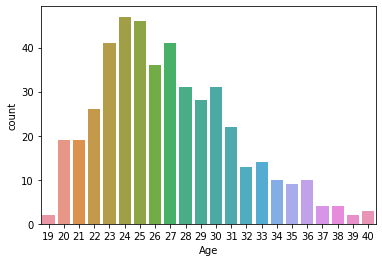

In [18]:
sns.countplot(x='Age',data=z)
plt.show()
#1. The age 24 is the predominant one=47 employees.
#2. The age of 25 doesnt fall far behind=46 employees.
#3. The age of 19,39 has minimum presence in the data=2.
#4. The median age is 26.
#5. The standard deviation of age is 4.4
#6. The mean age is approx 27.

In [19]:
z.dropna(inplace=True)
w=z.groupby(['Team'])['Salary'].sum().reset_index(name='Total Salary')
w[w['Total Salary']==w['Total Salary'].max()]

,Team,Total Salary
5,Cleveland Cavaliers,106988689.0


In [20]:
w[w['Total Salary']==w['Total Salary'].min()]

,Team,Total Salary
22,Philadelphia 76ers,30992894.0


In [21]:
w['Total Salary'].mean()

72026146.23333333

In [22]:
w['Total Salary'].median()

71727048.5

In [23]:
w['Total Salary'].std()

15118297.515183788

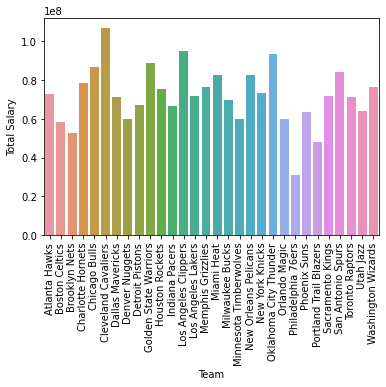

In [24]:
sns.barplot(x='Team',y='Total Salary',data=w)
plt.xticks(rotation=90)
plt.show()
#1. Cleveland Cavaliers has the maximum wage bill=106988689.
#2. Philadelphia 76ers has the lowest wage bill=30992894.
#3. Lowest team salary is approx 70% less than the highest team salary.
#4. The mean team salary is 72026146.
#5. The median team salary is 71727048.5
#6. The standard deviation is 15118297.5

In [25]:
v=z.groupby(['Position'])['Salary'].sum().reset_index(name='Total Salary')
v[v['Total Salary']==v['Total Salary'].max()]

,Position,Total Salary
0,C,466377332.0


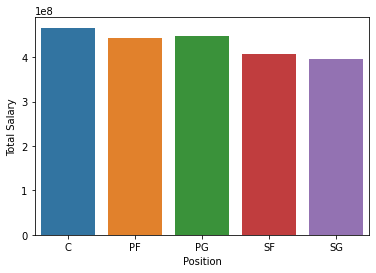

In [26]:
sns.barplot(x='Position',y='Total Salary',data=v)
plt.show()
#1. Position C has highest salary among positions.
#2. Position SG has the lowest salary.
#3. Maximum variation between salary related to positions is at 15% approximately.

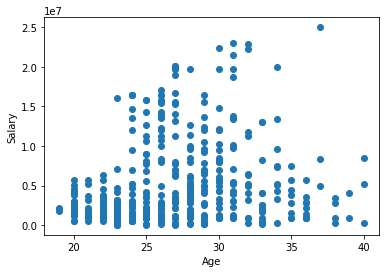

In [27]:
plt.scatter(x='Age',y='Salary',data=z)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
#1. No visible correlation observed

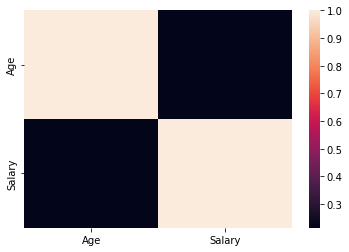

In [28]:
p=pd.DataFrame({'Age':z['Age'],'Salary':z['Salary']}).corr()
sns.heatmap(p)
plt.show()
#1. Age and salary has almost no correlation=0.214